In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

In [2]:
# Load data
X = pd.read_csv('logisticX (1).csv', header=None).values
y = pd.read_csv('logisticY.csv', header=None).values.flatten()

In [4]:
# Normalize features and add intercept
def normalize(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    return (X - mean) / std, mean, std

X_normalized, X_mean, X_std = normalize(X)
X_normalized = np.hstack((np.ones((X_normalized.shape[0], 1)), X_normalized))

In [5]:
#define Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [12]:
#Logarithmic Cost function
def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    cost = (-y @ np.log(h) - (1 - y) @ np.log(1 - h)) / m
    return cost


In [13]:
# Gradient descent
def gradient_descent(X, y, theta, learning_rate, num_iterations):
    m = len(y)
    cost_history = []
    
    for _ in range(num_iterations):
        h = sigmoid(X @ theta)
        gradient = X.T @ (h - y) / m
        theta -= learning_rate * gradient
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)
    
    return theta, cost_history

In [14]:
# Initialize parameters
theta = np.zeros(X_normalized.shape[1])

In [17]:
#question 1 implementation: 
def train_until_convergence(X, y, theta, learning_rate, tolerance=1e-6):
    m = len(y)
    cost_history = []
    prev_cost = float('inf')
    iterations = 0
    
    while True:
        h = sigmoid(X @ theta)
        gradient = X.T @ (h - y) / m
        theta -= learning_rate * gradient
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)
        iterations += 1
        
        if abs(prev_cost - cost) < tolerance:
            break
        prev_cost = cost
    
    return theta, cost_history, iterations

theta_final, cost_history, iterations = train_until_convergence(X_normalized, y, theta, 0.1)

In [18]:
print(f"Final cost function value: {cost_history[-1]:.6f}")
print(f"Learning parameters after convergence: {theta_final}")
print(f"Number of iterations to converge: {iterations}")

Final cost function value: 0.228658
Learning parameters after convergence: [ 0.35034958  2.45608495 -2.57504471]
Number of iterations to converge: 2


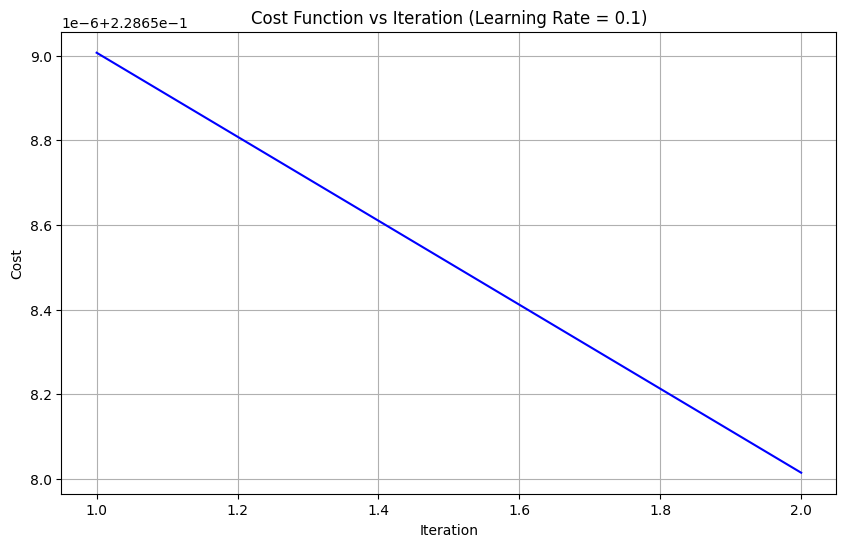

In [24]:
#Question 2 plotting cost vs iteration 
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cost_history)+1), cost_history, 'b-')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost Function vs Iteration (Learning Rate = 0.1)')
plt.grid(True)
plt.savefig('cost_vs_iteration.png')
plt.show()

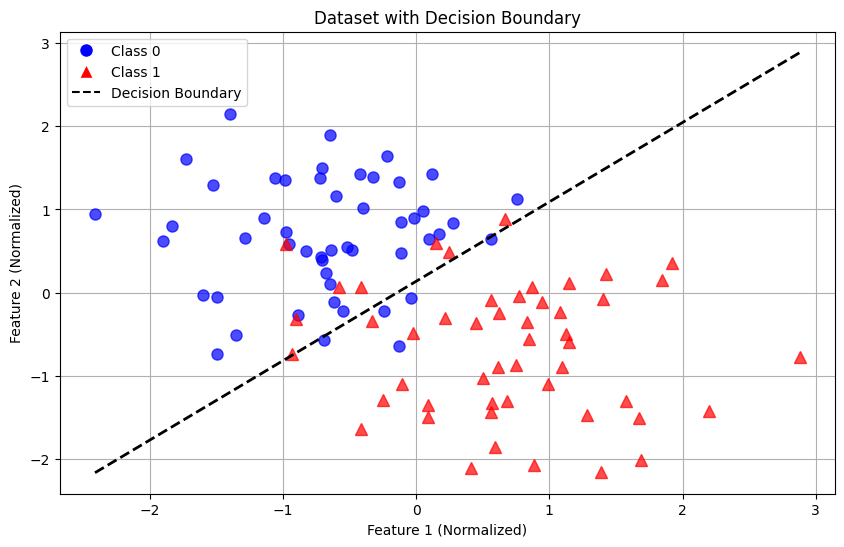

In [47]:
#Question 3 parts:
#dataset and decision boundary plot:
plt.figure(figsize=(10, 6))
for i in range(len(y)):
    if y[i] == 0:
        plt.plot(X_normalized[i, 1], X_normalized[i, 2], 'bo', markersize=8, alpha=0.7)
    else:
        plt.plot(X_normalized[i, 1], X_normalized[i, 2], 'r^', markersize=8, alpha=0.7)
x_values = np.array([np.min(X_normalized[:, 1]), np.max(X_normalized[:, 1])])
y_values = -(theta_final[0] + theta_final[1] * x_values) / theta_final[2]
plt.plot(x_values, y_values, 'k--', linewidth=2)

plt.xlabel('Feature 1 (Normalized)')
plt.ylabel('Feature 2 (Normalized)')
plt.title('Dataset with Decision Boundary')
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Class 0', markerfacecolor='b', markersize=10),
                   Line2D([0], [0], marker='^', color='w', label='Class 1', markerfacecolor='r', markersize=10),
                   Line2D([0], [0], color='k', linestyle='--', label='Decision Boundary')]
plt.legend(handles=legend_elements)
plt.grid(True)
plt.savefig('dataset_with_boundary.png')
plt.show()

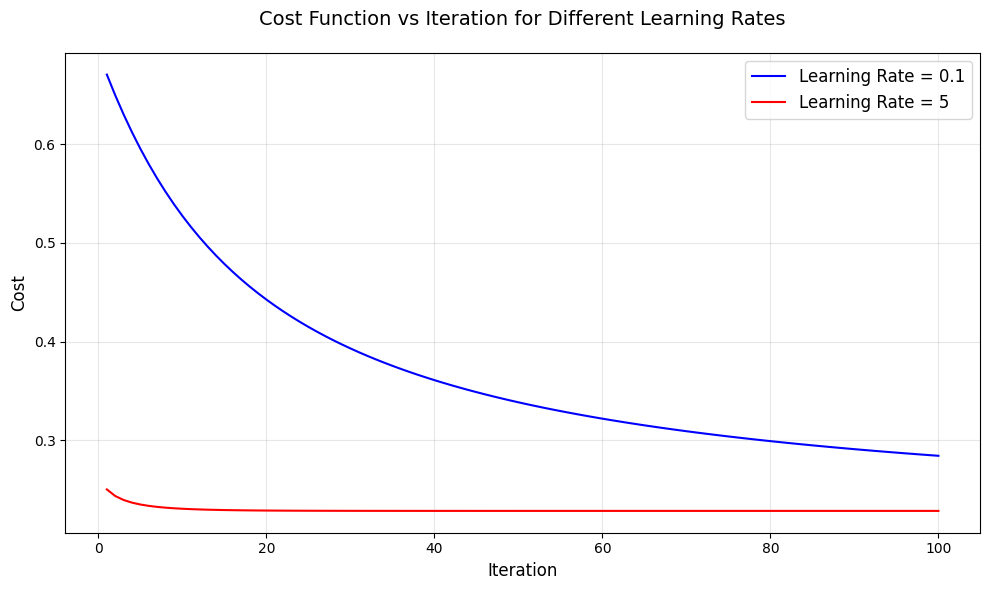

In [46]:
# Question 4: Compare learning rates 0.1 and 5 for 100 iterations
plt.figure(figsize=(10, 6))
# Learning rate 0.1
theta = np.zeros(X_normalized.shape[1])
_, cost_history_01 = gradient_descent(X_normalized, y, theta, 0.1, 100)
plt.plot(range(1, 101), cost_history_01, 'b-', label='Learning Rate = 0.1')

# Learning rate 5
theta = np.zeros(X_normalized.shape[1])
_, cost_history_5 = gradient_descent(X_normalized, y, theta, 5, 100)
plt.plot(range(1, 101), cost_history_5, 'r-', label='Learning Rate = 5')

plt.xlabel('Iteration', fontsize=12)
plt.ylabel('Cost', fontsize=12)
plt.title('Cost Function vs Iteration for Different Learning Rates', fontsize=14, pad=20)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('learning_rate_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

In [49]:
# Question 5: Confusion matrix and metrics
def predict(X, theta, threshold=0.5):
    return (sigmoid(X @ theta) >= threshold).astype(int)

y_pred = predict(X_normalized, theta_final)

def confusion_matrix(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    return tp, tn, fp, fn

tp, tn, fp, fn = confusion_matrix(y, y_pred)

accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp) if (tp + fp) != 0 else 0
recall = tp / (tp + fn) if (tp + fn) != 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
print(f"Confusion Matrix:\nTrue Positives: {tp}\nTrue Negatives: {tn}\nFalse Positives: {fp}\nFalse Negatives: {fn}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1_score:.4f}")

Confusion Matrix:
True Positives: 42
True Negatives: 45
False Positives: 5
False Negatives: 8
Accuracy: 0.8700
Precision: 0.8936
Recall: 0.8400
F1-Score: 0.8660
